In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cytominer_eval import evaluate_metrics

plt.rcParams["font.family"] = ["Roboto"]
plt.rcParams["font.size"] = 14

In [2]:
subset_plate_maps = [
    "OAB84.85.86.87.A",
    "OKA05.06.07.08.A",
    "OAA97.98.99.XX.A",
    "OAB25.26.27.28.A",
    "OAB41.OAC17.OAB78.79.A",
    "OAA49.59.79.80.A",
    "OAA58.60.61.62.A",
    "OAA85.86.87.88.A",
    "OAB13.14.15.16.A",
    "OAB33.34.35.36.A",
    "OAB37.38.39.40.A",
]

In [3]:
same_pert_diff_well = {
    "pos_sameby": {"all": ["Metadata_JCP2022", "Metadata_pert_type != 'negcon'"], "any": []},
    "pos_diffby": {"all": ["Metadata_Well"], "any": []},
    "neg_sameby": {"all": ["Metadata_Plate"], "any": []},
    "neg_diffby": {"all": ["Metadata_pert_type"], "any": []},
}

same_well_diff_pert = {
    "pos_sameby": {"all": ["Metadata_Well", "Metadata_pert_type != 'negcon'"], "any": []},
    "pos_diffby": {"all": ["Metadata_JCP2022"], "any": []},
    "neg_sameby": {"all": ["Metadata_Plate"], "any": []},
    "neg_diffby": {"all": ["Metadata_pert_type"], "any": []},
}

same_pert_diff_well_metrics_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_JCP2022"],
    },
}

same_well_diff_pert_metrics_config = {
    "mean_ap": {
        "null_size": 10000,
        "groupby_columns": ["Metadata_JCP2022"],
    },
}

In [4]:
og_profiles = pd.read_parquet("profiles/full_processed_profiles.parquet")
print(og_profiles.shape)

corrected_profiles = pd.read_parquet("profiles/full_profiles_cc_adj_mean_corr_preprocessed.parquet")
print(corrected_profiles.shape)

batch_corr_profiles = pd.read_parquet("profiles/mean_corr_cc_adj_0016ef5983f418ad16bae5913eff53c3_harmony_corrected_orf.parquet")
print(batch_corr_profiles.shape)

(78275, 838)
(79560, 1006)
(79431, 893)


In [5]:
batch_corr_profiles.filter(regex="^(?!Metadata_)").isnull().T.any().any()

False

In [6]:
print(og_profiles.filter(regex="Metadata").columns)

print(corrected_profiles.filter(regex="Metadata").columns)

print(batch_corr_profiles.filter(regex="Metadata").columns)

Index(['Metadata_JCP2022', 'Metadata_broad_sample', 'Metadata_Name',
       'Metadata_Vector', 'Metadata_Transcript', 'Metadata_Symbol',
       'Metadata_NCBI_Gene_ID', 'Metadata_Taxon_ID',
       'Metadata_Gene_Description', 'Metadata_Prot_Match',
       'Metadata_Insert_Length', 'Metadata_pert_type', 'Metadata_Source',
       'Metadata_Plate', 'Metadata_Well', 'Metadata_plate_map_name',
       'Metadata_Batch'],
      dtype='object')
Index(['Metadata_JCP2022', 'Metadata_broad_sample', 'Metadata_Name',
       'Metadata_Vector', 'Metadata_Transcript', 'Metadata_Symbol',
       'Metadata_NCBI_Gene_ID', 'Metadata_Taxon_ID',
       'Metadata_Gene_Description', 'Metadata_Prot_Match',
       'Metadata_Insert_Length', 'Metadata_pert_type', 'Metadata_Source',
       'Metadata_Plate', 'Metadata_Well', 'Metadata_plate_map_name',
       'Metadata_Batch'],
      dtype='object')
Index(['Metadata_Source', 'Metadata_Plate', 'Metadata_Well',
       'Metadata_JCP2022', 'Metadata_broad_sample', 'Metada

In [7]:
og_subset = og_profiles[og_profiles["Metadata_plate_map_name"].isin(subset_plate_maps)]
print(og_subset.shape)

corrected_subset = corrected_profiles[corrected_profiles["Metadata_plate_map_name"].isin(subset_plate_maps)]
print(corrected_subset.shape)

# batch_subset = batch_corr_profiles[batch_corr_profiles["Metadata_plate_map_name"].isin(subset_plate_maps)]
# print(batch_subset.shape)

(19143, 838)
(19143, 1006)


In [8]:
og_same_pert_diff_well_results = evaluate_metrics(
    profiles=og_subset.reset_index(drop=True),
    features=og_subset.filter(regex="^(?!Metadata_)").columns,
    meta_features= og_subset.filter(regex="Metadata_").columns,
    replicate_groups=same_pert_diff_well,
    metrics_config=same_pert_diff_well_metrics_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 925, Neg pairs size: 293768


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/15 [00:00<?, ?it/s]

In [9]:
og_same_well_diff_pert_results = evaluate_metrics(
    profiles=og_subset.reset_index(drop=True),
    features=og_subset.filter(regex="^(?!Metadata_)").columns,
    meta_features= og_subset.filter(regex="Metadata_").columns,
    replicate_groups=same_well_diff_pert,
    metrics_config=same_well_diff_pert_metrics_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 411790, Neg pairs size: 293768


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/32 [00:00<?, ?it/s]

In [10]:
og_same_pert_diff_well_results = og_same_pert_diff_well_results["mean_ap"]
og_same_pert_diff_well_results.rename(columns={"mean_ap": "mAP"}, inplace=True)
og_same_pert_diff_well_results["-log10(p-value)"] = -np.log10(og_same_pert_diff_well_results["p_value"])
og_same_pert_diff_well_results["p < 0.05"] = og_same_pert_diff_well_results["p_value"] < 0.05

In [11]:
og_same_pert_diff_well_results["mAP"].mean()

0.3232646953003662

Text(0.9090952380952382, 0.018410516902804375, 'Mean mAP: 0.32')

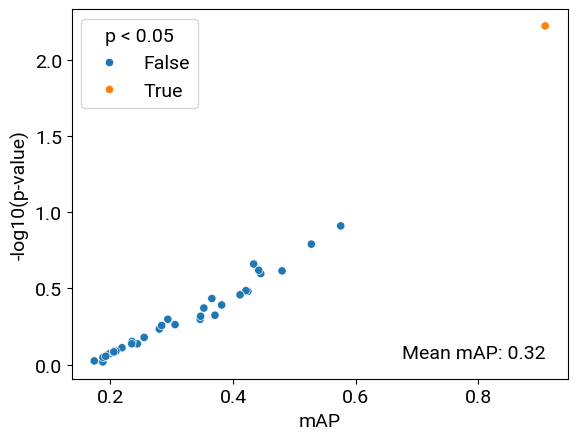

In [12]:
sns.scatterplot(og_same_pert_diff_well_results, x="mAP", y="-log10(p-value)", hue="p < 0.05")
mean_map = og_same_pert_diff_well_results["mAP"].mean()
x_pos = og_same_pert_diff_well_results["mAP"].max()  # Far right
y_pos = og_same_pert_diff_well_results["-log10(p-value)"].min()  # Bottom
plt.text(x_pos, y_pos, f'Mean mAP: {mean_map:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=14)

In [13]:
og_same_well_diff_pert_results = og_same_well_diff_pert_results["mean_ap"]
og_same_well_diff_pert_results.rename(columns={"mean_ap": "mAP"}, inplace=True)
og_same_well_diff_pert_results["-log10(p-value)"] = -np.log10(og_same_well_diff_pert_results["p_value"])
og_same_well_diff_pert_results["p < 0.05"] = og_same_well_diff_pert_results["p_value"] < 0.05

Text(0.9602395168109717, 0.2160148322582245, 'Mean mAP: 0.83')

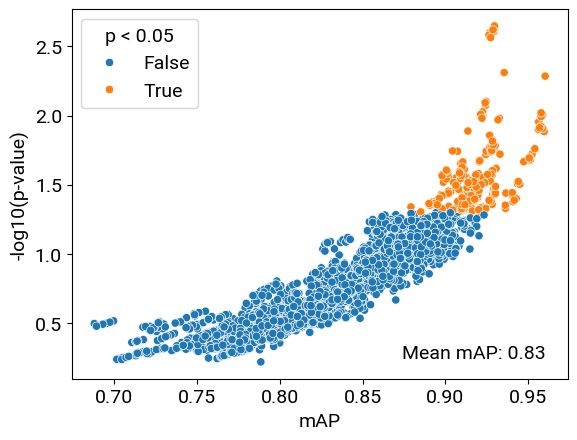

In [14]:
sns.scatterplot(og_same_well_diff_pert_results, x="mAP", y="-log10(p-value)", hue="p < 0.05")
mean_map = og_same_well_diff_pert_results["mAP"].mean()
x_pos = og_same_well_diff_pert_results["mAP"].max()  # Far right
y_pos = og_same_well_diff_pert_results["-log10(p-value)"].min()  # Bottom
plt.text(x_pos, y_pos, f'Mean mAP: {mean_map:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=14)

In [15]:
corrected_same_pert_diff_well_results = evaluate_metrics(
    profiles=corrected_subset.reset_index(drop=True),
    features=corrected_subset.filter(regex="^(?!Metadata_)").columns,
    meta_features= corrected_subset.filter(regex="Metadata_").columns,
    replicate_groups=same_pert_diff_well,
    metrics_config=same_pert_diff_well_metrics_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 925, Neg pairs size: 293768


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/15 [00:00<?, ?it/s]

In [16]:
corrected_same_well_diff_pert_results = evaluate_metrics(
    profiles=corrected_subset.reset_index(drop=True),
    features=corrected_subset.filter(regex="^(?!Metadata_)").columns,
    meta_features= corrected_subset.filter(regex="Metadata_").columns,
    replicate_groups=same_well_diff_pert,
    metrics_config=same_well_diff_pert_metrics_config,
    use_copairs=True,
)


Calculating distances.
Pos pairs size: 411790, Neg pairs size: 293768


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Calculating metric: mean_ap


/dgx1nas1/storage/data/akalinin/projects/copairs/src/copairs/compute.py:105: RuntimeWarning: invalid value encountered in divide
  ap_scores = np.add.reduceat(pr_k * rel_k_list, cutoffs) / num_pos


  0%|          | 0/32 [00:00<?, ?it/s]

In [17]:
corrected_same_pert_diff_well_results = corrected_same_pert_diff_well_results["mean_ap"]
corrected_same_pert_diff_well_results.rename(columns={"mean_ap": "mAP"}, inplace=True)
corrected_same_pert_diff_well_results["-log10(p-value)"] = -np.log10(corrected_same_pert_diff_well_results["p_value"])
corrected_same_pert_diff_well_results["p < 0.05"] = corrected_same_pert_diff_well_results["p_value"] < 0.05

In [18]:
corrected_same_pert_diff_well_results["mAP"].mean()

0.35080343719827495

Text(0.9412380952380953, 0.03648698329925537, 'Mean mAP: 0.35')

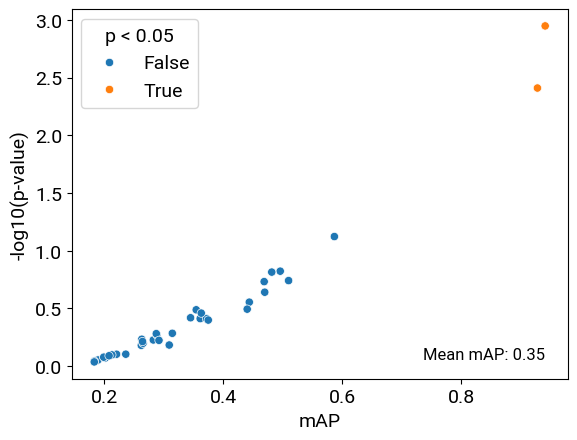

In [19]:
sns.scatterplot(corrected_same_pert_diff_well_results, x="mAP", y="-log10(p-value)", hue="p < 0.05")
mean_map = corrected_same_pert_diff_well_results["mAP"].mean()
x_pos = corrected_same_pert_diff_well_results["mAP"].max()  # Far right
y_pos = corrected_same_pert_diff_well_results["-log10(p-value)"].min()  # Bottom
plt.text(x_pos, y_pos, f'Mean mAP: {mean_map:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=12)

In [20]:
corrected_same_well_diff_pert_results = corrected_same_well_diff_pert_results["mean_ap"]
corrected_same_well_diff_pert_results.rename(columns={"mean_ap": "mAP"}, inplace=True)
corrected_same_well_diff_pert_results["-log10(p-value)"] = -np.log10(corrected_same_well_diff_pert_results["p_value"])
corrected_same_well_diff_pert_results["p < 0.05"] = corrected_same_well_diff_pert_results["p_value"] < 0.05

Text(1.0, 0.20525282621383667, 'Mean mAP: 0.86')

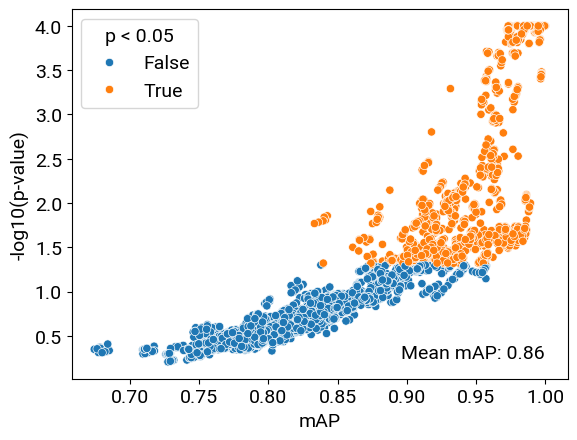

In [21]:
sns.scatterplot(corrected_same_well_diff_pert_results, x="mAP", y="-log10(p-value)", hue="p < 0.05")
mean_map = corrected_same_well_diff_pert_results["mAP"].mean()
x_pos = corrected_same_well_diff_pert_results["mAP"].max()  # Far right
y_pos = corrected_same_well_diff_pert_results["-log10(p-value)"].min()  # Bottom
plt.text(x_pos, y_pos, f'Mean mAP: {mean_map:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=14)

In [22]:
og_same_pert_diff_well_results["label"] = "Original"
corrected_same_pert_diff_well_results["label"] = "Corrected"

df = pd.concat([og_same_pert_diff_well_results, corrected_same_pert_diff_well_results])
df

,Metadata_JCP2022,mAP,p_value,n_pos_pairs,n_total_pairs,-log10(p-value),p < 0.05,label
0,JCP2022_900041,0.381445,0.405599,5.0,23.0,0.391903,False,Original
1,JCP2022_900288,0.424235,0.330287,5.0,21.0,0.481109,False,Original
2,JCP2022_900475,0.370508,0.473463,5.0,23.0,0.324714,False,Original
3,JCP2022_900832,0.279828,0.583252,5.0,23.0,0.234144,False,Original
4,JCP2022_901127,0.305410,0.545585,5.0,23.0,0.263137,False,Original
...,...,...,...,...,...,...,...,...
32,JCP2022_912584,0.291811,0.597800,5.0,23.0,0.223444,False,Corrected
33,JCP2022_912974,0.481428,0.153245,5.0,23.0,0.814615,False,Corrected
34,JCP2022_912981,0.586767,0.075432,5.0,23.0,1.122442,False,Corrected
35,JCP2022_912995,0.314229,0.519408,5.0,21.0,0.284491,False,Corrected


/tmp/ipykernel_5404/2693679128.py:49: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(


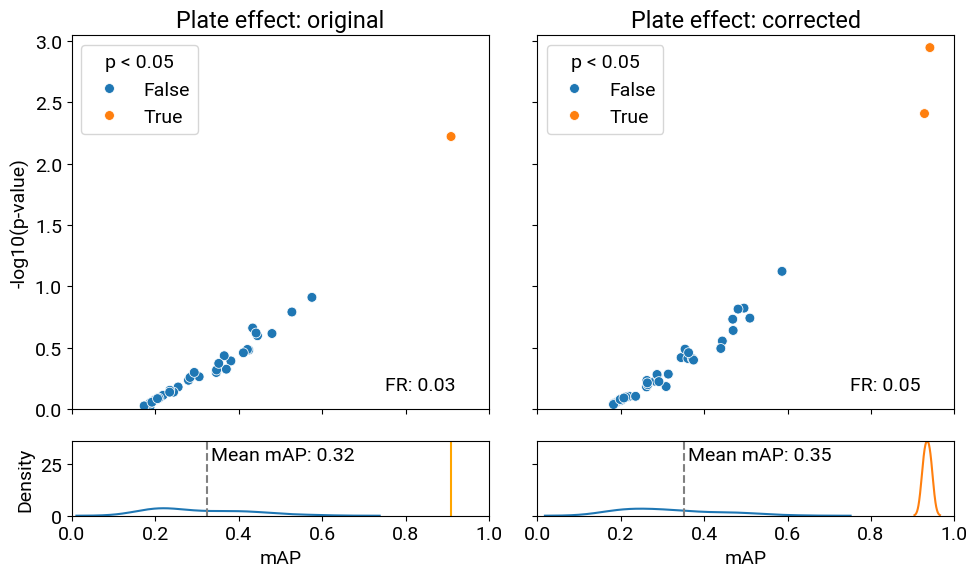

In [25]:
def remove_inner_ticklabels(fig: plt.Figure):
    """
    Remove inner ticklabels from a figure.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Figure to remove inner ticklabels from.
    """
    for ax in fig.axes:
        try:
            ax.label_outer()
        except AttributeError:
            pass


fig, axes = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [5, 1]})

for i, label in enumerate(['Original', 'Corrected']):
    label_df = df[df['label'] == label]
    mean_map = label_df['mAP'].mean()
    fr = label_df['p < 0.05'].mean()

    sns.scatterplot(
        ax=axes[0, i], 
        data=label_df, 
        x='mAP', 
        y='-log10(p-value)', 
        hue='p < 0.05',
        s=50
    )
    axes[0, i].set_title(label)
    axes[0, i].text(0.75, 0.05, f"FR: {fr:.2f}", transform=axes[0, i].transAxes)

axes[0, 0].set_title('Plate effect: original')
axes[0, 0].set_xlabel("")
axes[0, 1].set_title('Plate effect: corrected')
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")
sns.move_legend(axes[0, 0], "upper left")

# Second Row: KDE plots
max_kde_y = 0
for i, label in enumerate(['Original', 'Corrected']):
    label_df = df[df['label'] == label]
    mean_map = label_df['mAP'].mean()

    for p_value in df['p < 0.05'].unique():
        ax = sns.kdeplot(
            ax=axes[1, i],
            data=label_df[label_df['p < 0.05'] == p_value],
            x='mAP', 
            label=str(p_value)
        )
        max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))

    # axes[1, i].set_title(f'{label} - KDE of mAP')
    # axes[1, i].legend()
    axes[1, i].axvline(mean_map, color='grey', linestyle='--')
    axes[1, i].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1, i].transAxes)
axes[1, 1].set_ylabel("")


axes[1, 0].axvline(df[df['label'] == "Original"]["mAP"].max(), color='orange')

# Adjustments
for ax in axes[0, :]:  # Share y-axis for the first row
    ax.set_ylim(0, max(df['-log10(p-value)'])+0.1)
for ax in axes[1, :]:
    ax.set_ylim(0, max_kde_y)
for ax in axes.flat:
    ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

remove_inner_ticklabels(fig)
plt.tight_layout()
plt.show()


In [ ]:
og_same_pert_diff_well_results

,Metadata_JCP2022,mAP,p_value,n_pos_pairs,n_total_pairs,-log10(p-value),p < 0.05,label
0,JCP2022_900041,0.381445,0.405599,5.0,23.0,0.391903,False,Original
1,JCP2022_900288,0.424235,0.330287,5.0,21.0,0.481109,False,Original
2,JCP2022_900475,0.370508,0.473463,5.0,23.0,0.324714,False,Original
3,JCP2022_900832,0.279828,0.583252,5.0,23.0,0.234144,False,Original
4,JCP2022_901127,0.305410,0.545585,5.0,23.0,0.263137,False,Original
5,JCP2022_903189,0.208095,0.811699,5.0,23.0,0.090605,False,Original
6,JCP2022_904840,0.208514,0.812509,5.0,23.0,0.090172,False,Original
7,JCP2022_905399,0.255050,0.661774,5.0,23.0,0.179290,False,Original
8,JCP2022_905771,0.194074,0.869023,5.0,23.0,0.060969,False,Original
9,JCP2022_906380,0.346403,0.503910,5.0,23.0,0.297647,False,Original
